<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/golon/ML2024_03_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from numpy import mean
from numpy import std
from numpy import absolute

from matplotlib import pyplot

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsRegressor

In [47]:
#load data
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)
X = pd.DataFrame(data = housing.data, columns = housing.feature_names)
print(X.head())
y=housing.target

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [48]:

models = {
    'Liniowa': Pipeline([
        ('scaler', MinMaxScaler()),
        ('regressor', LinearRegression())
    ]),
    'Wielomianowa 2 stopnia': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('scaler', MinMaxScaler()),
        ('regressor', LinearRegression())
    ]),
    'Wielomianowa 3 stopnia': Pipeline([
        ('poly', PolynomialFeatures(degree=3)),
        ('scaler', MinMaxScaler()),
        ('regressor', LinearRegression())
    ]),
    'Regresja KNN': Pipeline([
        ('scaler', MinMaxScaler()),
        ('regressor', KNeighborsRegressor())
    ])
}


In [49]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    results[name] = scores

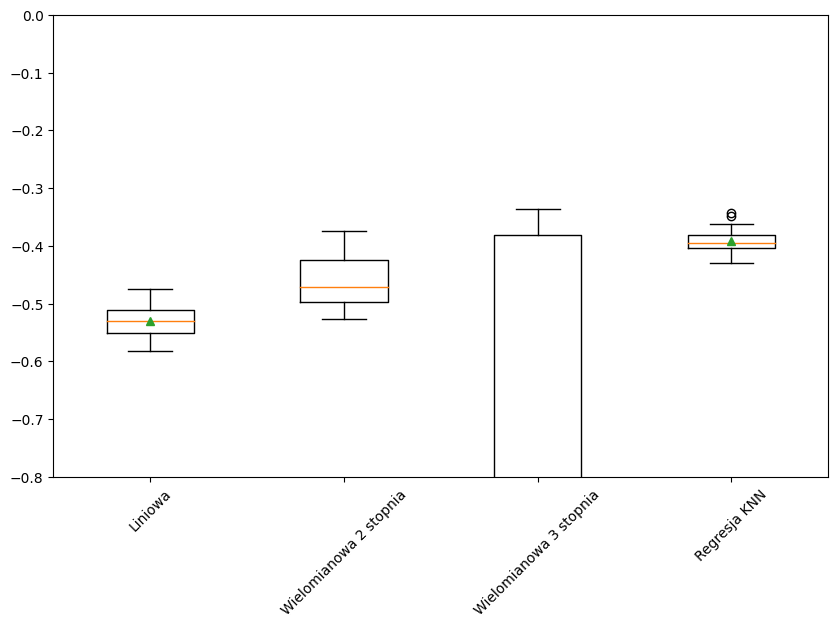

In [50]:
pyplot.figure(figsize=(10, 6))
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.xticks(rotation=45)
pyplot.ylim(-0.8, 0)
#pyplot.ylabel('Średni błąd')
pyplot.show()

Mean MAE: -0.532


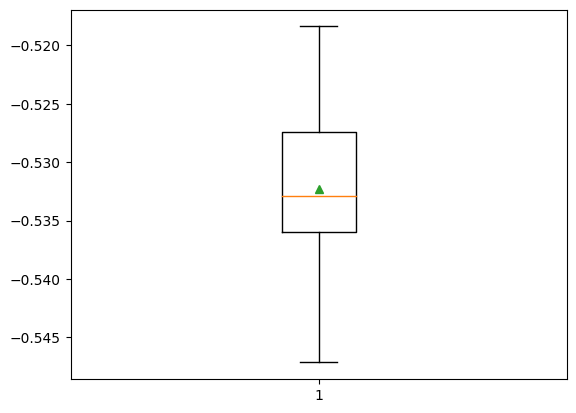

In [51]:
model = TransformedTargetRegressor(regressor=LinearRegression())
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
scores_tv=cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores=absolute(scores_tv)
s_mean=mean(scores_tv)
print('Mean MAE: %.3f' % (s_mean))

pyplot.boxplot(scores_tv,showmeans=True)
pyplot.show()